In [1]:
## import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load_Data
data=pd.read_csv("M:/DataSets/Social_Network_Ads.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [3]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

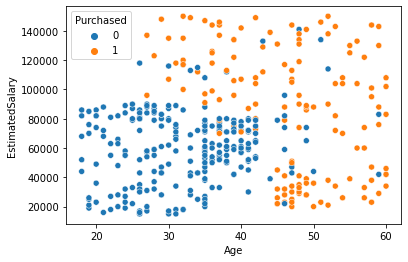

In [4]:
## realtionship b/w age and salary regarding purchase
sns.scatterplot(x='Age',y='EstimatedSalary',data=data,hue='Purchased')

In [5]:
X=data.drop('Purchased',axis=1)
Y=data.iloc[:,-1:]

In [6]:
## split test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=23,shuffle=True)

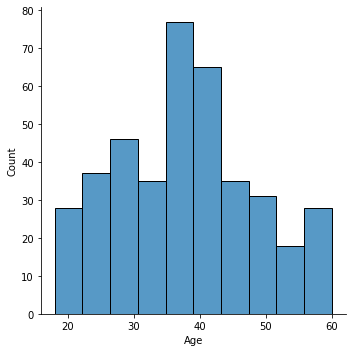

In [7]:
sns.displot(data['Age'])

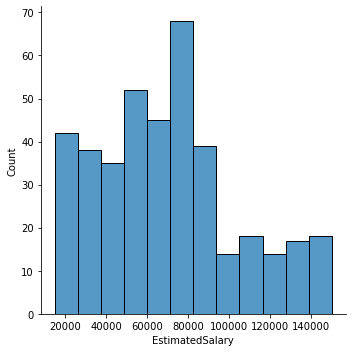

In [8]:
sns.displot(data['EstimatedSalary'])

In [9]:
## standardize  the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

## SVM with Linear Kernel

In [10]:
## model creation 
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train_scaled,y_train)

y_pred=model.predict(x_test_scaled)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [11]:
from sklearn.metrics import confusion_matrix,classification_report
print(model.score(x_train_scaled,y_train))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.84
[[61  4]
 [12 23]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.88        65
           1       0.85      0.66      0.74        35

    accuracy                           0.84       100
   macro avg       0.84      0.80      0.81       100
weighted avg       0.84      0.84      0.83       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


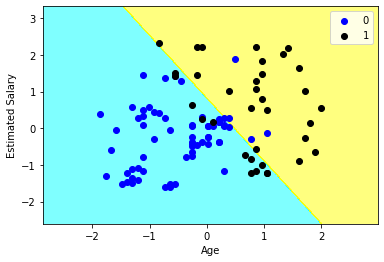

In [12]:
## lets look at the descison boundary once
from matplotlib.colors import ListedColormap
X_Set, Y_Set = x_test_scaled,np.ravel(y_test)
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1,X2,model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('cyan', 'yellow')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('blue', 'black'))(i), label = j)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## SVM with Non-linear Kernel 

In [13]:
## model creation 
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(x_train_scaled,y_train)

y_pred=model.predict(x_test_scaled)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [14]:
from sklearn.metrics import confusion_matrix,classification_report
print(model.score(x_train_scaled,y_train))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9133333333333333
[[59  6]
 [ 4 31]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        65
           1       0.84      0.89      0.86        35

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.90      0.90      0.90       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


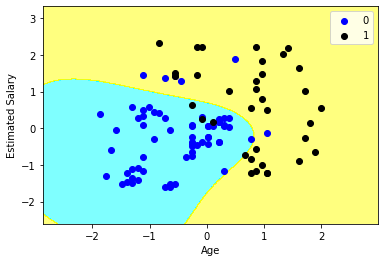

In [15]:
## lets look at the descison boundary once
from matplotlib.colors import ListedColormap
X_Set, Y_Set = x_test_scaled,np.ravel(y_test)
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1,X2,model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('cyan', 'yellow')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('blue', 'black'))(i), label = j)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()